In [1]:
import numpy as np
import pandas as pd
import ast

In [74]:
train = pd.read_csv('../../data/train.csv')
test = pd.read_csv('../../data/test.csv')

dict_columns = ['belongs_to_collection', 'genres', 'production_companies',
                'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

def text_to_dict(df):
    for column in dict_columns:
        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x) )
    return df

train_info = train.isnull().sum()/len(train)*100
        
train = text_to_dict(train)
test = text_to_dict(test)

In [75]:
train_info

id                        0.000000
belongs_to_collection    79.866667
budget                    0.000000
genres                    0.233333
homepage                 68.466667
imdb_id                   0.000000
original_language         0.000000
original_title            0.000000
overview                  0.266667
popularity                0.000000
poster_path               0.033333
production_companies      5.200000
production_countries      1.833333
release_date              0.000000
runtime                   0.066667
spoken_languages          0.666667
status                    0.000000
tagline                  19.900000
title                     0.000000
Keywords                  9.200000
cast                      0.433333
crew                      0.533333
revenue                   0.000000
dtype: float64

In [3]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,{},3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,{},1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,{},0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,{},"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


id                        0.000000
belongs_to_collection     0.000000
budget                    0.000000
genres                    0.000000
homepage                 68.466667
imdb_id                   0.000000
original_language         0.000000
original_title            0.000000
overview                  0.266667
popularity                0.000000
poster_path               0.033333
production_companies      0.000000
production_countries      0.000000
release_date              0.000000
runtime                   0.066667
spoken_languages          0.000000
status                    0.000000
tagline                  19.900000
title                     0.000000
Keywords                  0.000000
cast                      0.000000
crew                      0.000000
revenue                   0.000000
dtype: float64

## Data visualisation

In [4]:
train['genres'].apply(lambda x: len(x) if x != {} else 0).value_counts()

2    972
3    900
1    593
4    393
5    111
6     21
0      7
7      3
Name: genres, dtype: int64

In [5]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

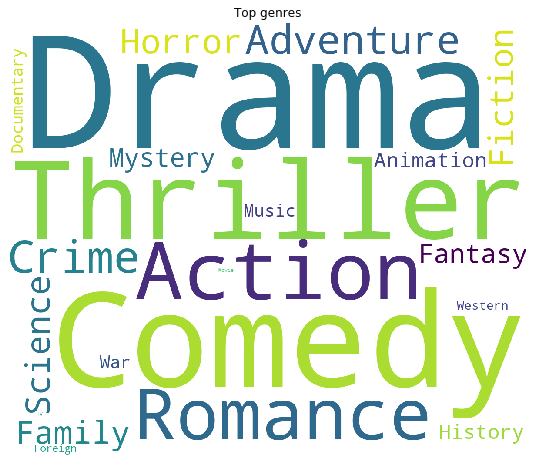

In [6]:
list_of_genres = list(train['genres'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
plt.figure(figsize = (12, 8))
text = ' '.join([i for j in list_of_genres for i in j])
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top genres')
plt.axis("off")
plt.show()

In [7]:
from collections import Counter
counter_genres = Counter([i for j in list_of_genres for i in j]).most_common()

In [14]:
list_of_genres = list(train['genres'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)

In [79]:
# from collections import defaultdict   

# genres_to_movies_mapping = defaultdict(list)

# for idx, row in train.iterrows():
#     for g in row["genres"]:
#         g_name = g["name"]
#         genres_to_movies_mapping[g_name].append(row['original_title'])

# dict(genres_to_movies_mapping)

In [76]:
# exploded_genres = pd.DataFrame({
#     "original_title":np.repeat(train["original_title"].values, train["genres"].str.len())
# }).assign(**{"genres":np.concatenate(train["genres"].apply(
#     lambda x: [i['name'] for i in x] if x != {} else []).values)})

# genre_to_name_mapping = exploded_genres.groupby("genres")["original_title"].apply(lambda x: x.tolist())


In [78]:
exploded_train = train.explode('genres')
exploded_train['genres'] = exploded_train['genres'].fillna({})
exploded_train["genres"] = exploded_train["genres"].apply(
    lambda x: x["name"] if (type(x) == dict and x != {}) else "")

genre_to_name_mapping = exploded_train.groupby('genres')['original_title'].apply(list).to_dict()

In [ ]:
for i for range(len(exploded_train)):
    if exploded_train[]

In [61]:
genre_to_name_mapping

{'': ['The Book of Mormon Movie, Volume 1: The Journey',
  'Jackpot',
  'Курочка Ряба',
  'Небо. Самолёт. Девушка.',
  'Amarkalam',
  'Лифт',
  'Poslednyaya skazka Rity'],
 'Action': ['마린보이',
  'Muppet Treasure Island',
  'Minority Report',
  'Šišanje',
  'Transporter 2',
  'Changing Lanes',
  'The Last Witch Hunter',
  'Rush Hour 3',
  'Safe',
  'Outbreak',
  'Cocaine Cowboys',
  'Star Trek: Generations',
  'Risen',
  'Batman & Robin',
  'All About the Benjamins',
  'Casino Royale',
  'Bloodsport',
  'The Fast and the Furious: Tokyo Drift',
  "Sharky's Machine",
  'Dark Blue',
  'Congo',
  '紅番區',
  'Kill Bill: Vol. 1',
  'Nuit Blanche',
  'Colors',
  'Dark Angel',
  '바르게 살자',
  'Braveheart',
  'Bandits',
  'In the Heart of the Sea',
  'The Lord of the Rings: The Fellowship of the Ring',
  'Undercover Brother',
  'Wild Hogs',
  '一個好人',
  'Rush Hour 2',
  'Loose Cannons',
  'Romeo Must Die',
  'Corvette Summer',
  'X2',
  'Snowpiercer',
  'Vigilante',
  'Бой с Тенью',
  'American Cyborg

In [13]:
train['num_genres'] = train['genres'].apply(lambda x: len(x) if x != {} else 0)
train['all_genres'] = train['genres'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_genres = [m[0] for m in Counter([i for j in list_of_genres for i in j]).most_common(14)]
for g in top_genres:
    train['genre_' + g] = train['all_genres'].apply(lambda x: 1 if g in x else 0)
    
test['num_genres'] = test['genres'].apply(lambda x: len(x) if x != {} else 0)
test['all_genres'] = test['genres'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_genres:
    test['genre_' + g] = test['all_genres'].apply(lambda x: 1 if g in x else 0)